In [227]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [228]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(5, 64, bias = True),
      nn.ReLU(),
      nn.Linear(64, 32, bias = True),
      nn.ReLU(),
      nn.Linear(32, 1, bias = True)
    )

  def forward(self, x):
      return self.layers(x)

In [229]:
#Reading in the data

xls = pd.ExcelFile("ml_data_final.xlsx")

df_train = pd.read_excel(xls, "Sheet1")
df_train_og = pd.read_excel(xls, "Sheet1")

In [230]:
for i in range(df_train.shape[0]):
    df_train['Category'][i] = df_train['Category'][i].lower()
    df_train['Brand'][i] = df_train['Brand'][i].lower()

<ipython-input-230-639555bb9e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Category'][i] = df_train['Category'][i].lower()
<ipython-input-230-639555bb9e89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Brand'][i] = df_train['Brand'][i].lower()


In [231]:
df_train.drop(['Product_name','Product_url'],axis=1,inplace=True)
#Taking of the columns which are of no use

## Data cleaning

In [232]:
import klib

In [233]:
df_train = klib.data_cleaning(df_train)

Shape of cleaned data: (1405, 6)Remaining NAs: 0

Changes:
Dropped rows: 96
     of which 96 duplicates. (Rows: [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 194, 195, 199, 255, 478, 502, 504, 505, 506, 1164, 1360, 1372, 1399, 1428, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-57.14%)



In [234]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called 

,category,avg_review,no_of_reviews,price,brand,average_sales_month
0,clothing and accessories,4.4,197.0,379.0,lymio,500
1,clothing and accessories,4.1,482.0,369.0,lymio,436
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,clothing and accessories,3.8,367.0,359.0,siril,251
...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951
1401,electronics,4.6,6532.0,1495.0,logitech,449
1402,electronics,4.6,4123.0,1482.0,logitech,411
1403,electronics,4.2,28964.0,229.0,redmi,1296


In [235]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             1405 non-null   category
 1   avg_review           1405 non-null   float32 
 2   no_of_reviews        1405 non-null   float32 
 3   price                1405 non-null   float32 
 4   brand                1405 non-null   string  
 5   average_sales_month  1405 non-null   int16   
dtypes: category(1), float32(3), int16(1), string(1)
memory usage: 31.8 KB


In [236]:
df_train = klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             1405 non-null   category
 1   avg_review           1405 non-null   Float32 
 2   no_of_reviews        1405 non-null   Float32 
 3   price                1405 non-null   Float32 
 4   brand                1405 non-null   string  
 5   average_sales_month  1405 non-null   int16   
dtypes: Float32(3), category(1), int16(1), string(1)
memory usage: 35.9 KB


In [237]:
klib.mv_col_handling(df_train)

,category,avg_review,no_of_reviews,price,brand,average_sales_month
0,clothing and accessories,4.4,197.0,379.0,lymio,500
1,clothing and accessories,4.1,482.0,369.0,lymio,436
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,clothing and accessories,3.8,367.0,359.0,siril,251
...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951
1401,electronics,4.6,6532.0,1495.0,logitech,449
1402,electronics,4.6,4123.0,1482.0,logitech,411
1403,electronics,4.2,28964.0,229.0,redmi,1296


### Label encoding

In [238]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [239]:
df_train['category_le']= le.fit_transform(df_train['category'])
df_train['brand_le']= le.fit_transform(df_train['brand'])

In [240]:
df_train

,category,avg_review,no_of_reviews,price,brand,average_sales_month,category_le,brand_le
0,clothing and accessories,4.4,197.0,379.0,lymio,500,0,221
1,clothing and accessories,4.1,482.0,369.0,lymio,436,0,221
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321,0,93
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284,0,47
4,clothing and accessories,3.8,367.0,359.0,siril,251,0,343
...,...,...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951,1,315
1401,electronics,4.6,6532.0,1495.0,logitech,449,1,218
1402,electronics,4.6,4123.0,1482.0,logitech,411,1,218
1403,electronics,4.2,28964.0,229.0,redmi,1296,1,316


In [241]:
X=df_train.drop(['average_sales_month', 'category', 'brand'] ,axis=1)


In [242]:
Y = df_train['average_sales_month']

### Splitting data into training and testing

In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 101, test_size = 0.2)

### Standardization

In [244]:
X.describe()

,avg_review,no_of_reviews,price,category_le,brand_le
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,4.055800,11115.551758,3964.181885,1.019217,231.662633
std,0.469546,35014.593750,11107.629883,0.828826,122.015488
min,1.000000,1.000000,10.000000,0.000000,0.000000
25%,3.900000,178.000000,380.000000,0.000000,125.000000
50%,4.100000,754.000000,675.000000,1.000000,236.000000
75%,4.400000,6227.000000,1499.000000,2.000000,325.000000
max,5.000000,396978.000000,134990.000000,2.000000,426.000000


In [245]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [246]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

### Building linear regression predictor using pytorch

In [247]:
model = MLP()

In [248]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [249]:
#Converting dataframe to numpy array
#X_train_arr = X_train.to_numpy(dtype = np.float32)
#X_test_arr = X_test.to_numpy(dtype = np.float32)
Y_train_arr = Y_train.to_numpy(dtype = np.float32)
Y_test_arr = Y_test.to_numpy(dtype = np.float32)

In [250]:
Y_train_2d = np.reshape(Y_train_arr, (Y_train_arr.shape[0], 1) )
Y_test_2d = np.reshape(Y_test_arr, (Y_test_arr.shape[0], 1))
#Y_test_2d

In [251]:
#Normalizing the output
Y_train_std = sc.fit_transform(Y_train_2d)
Y_test_std = sc.fit_transform(Y_test_2d)

In [252]:
Y_train_std = np.reshape(Y_train_std, (Y_train_arr.shape))
Y_test_std = np.reshape(Y_test_std, (Y_test_arr.shape))

In [253]:
inputs = torch.from_numpy(X_train_std.astype(np.float32))
targets = torch.from_numpy(Y_train_std.astype(np.float32))

### Training the model

In [254]:
no_of_epochs = 350
losses = []

for i in range(no_of_epochs):
    #Zero the parameter gradients
    optimizer.zero_grad()

    #Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    #Record the losses
    losses.append(loss.item())

    #Backward and optimize
    loss.backward()
    optimizer.step()

    print(f"Epoch {i + 1}/{no_of_epochs} : Loss = {loss.item():.4f}")

E:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([1124])) that is different to the input size (torch.Size([1124, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/350 : Loss = 1.0139
Epoch 2/350 : Loss = 1.0135
Epoch 3/350 : Loss = 1.0131
Epoch 4/350 : Loss = 1.0127
Epoch 5/350 : Loss = 1.0123
Epoch 6/350 : Loss = 1.0119
Epoch 7/350 : Loss = 1.0116
Epoch 8/350 : Loss = 1.0112
Epoch 9/350 : Loss = 1.0109
Epoch 10/350 : Loss = 1.0105
Epoch 11/350 : Loss = 1.0102
Epoch 12/350 : Loss = 1.0099
Epoch 13/350 : Loss = 1.0096
Epoch 14/350 : Loss = 1.0093
Epoch 15/350 : Loss = 1.0090
Epoch 16/350 : Loss = 1.0087
Epoch 17/350 : Loss = 1.0084
Epoch 18/350 : Loss = 1.0081
Epoch 19/350 : Loss = 1.0078
Epoch 20/350 : Loss = 1.0076
Epoch 21/350 : Loss = 1.0073
Epoch 22/350 : Loss = 1.0071
Epoch 23/350 : Loss = 1.0068
Epoch 24/350 : Loss = 1.0066
Epoch 25/350 : Loss = 1.0064
Epoch 26/350 : Loss = 1.0062
Epoch 27/350 : Loss = 1.0059
Epoch 28/350 : Loss = 1.0057
Epoch 29/350 : Loss = 1.0056
Epoch 30/350 : Loss = 1.0054
Epoch 31/350 : Loss = 1.0052
Epoch 32/350 : Loss = 1.0050
Epoch 33/350 : Loss = 1.0048
Epoch 34/350 : Loss = 1.0047
Epoch 35/350 : Loss = 1

Text(0.5, 1.0, 'for 300 epochs, lr = 0.001')

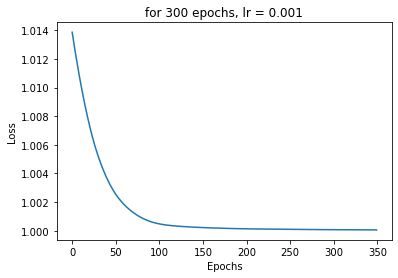

In [255]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("for 300 epochs, lr = 0.001")

In [257]:
output = model(inputs[0])

In [258]:
output

tensor([0.0147], grad_fn=<AddBackward0>)

In [259]:
def denormalize(output):
    x = output * np.std(Y_train) + np.mean(Y_train)
    return x

In [260]:
X_test_t = torch.from_numpy(X_test_std.astype(np.float32))
output_test = model(X_test_t)

In [261]:
output_test
outputs = []
for i in range(len(output_test)):
    outputs.append(denormalize(output_test[i].item()))

In [262]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [263]:
print('R2 score : ', r2_score(Y_test,outputs))
print('mean absolute error : ',mean_absolute_error(Y_test,outputs))
print('Mean squared error : ',np.sqrt(mean_squared_error(Y_test,outputs)))

R2 score :  -0.01043290526890095
mean absolute error :  830.6855992596439
Mean squared error :  1207.7023084938144
